In [1]:
# Import PySwarms
import pyswarms as ps
from pyswarms.utils.functions import single_obj as fx
from IPython.display import HTML, Image
#Import mathplot lib
import matplotlib.pyplot as plt
from matplotlib import animation, rc
from pyswarms.utils.plotters import plot_contour, plot_surface
from pyswarms.utils.plotters.formatters import Designer
from pyswarms.utils.plotters.formatters import Mesher

In [2]:
# Set-up hyperparameters
options = {'c1': 0.5, 'c2': 0.3, 'w':0.9}
# Call instance of PSO
optimizer = ps.single.GlobalBestPSO(n_particles=10, dimensions=2, options=options)
# Perform optimization
cost, pos = optimizer.optimize(fx.sphere, iters=1000)

2021-10-27 14:04:13,316 - pyswarms.single.global_best - INFO - Optimize for 1000 iters with {'c1': 0.5, 'c2': 0.3, 'w': 0.9}
pyswarms.single.global_best: 100%|██████████|1000/1000, best_cost=2.25e-44
2021-10-27 14:04:14,029 - pyswarms.single.global_best - INFO - Optimization finished | best cost: 2.2499799573688985e-44, best pos: [-6.45698999e-23 -1.35390279e-22]


In [3]:
# equivalent to rcParams['animation.html'] = 'html5'
rc('animation', html='html5')

2021-10-27 14:04:19,809 - matplotlib.animation - INFO - Animation.save using <class 'matplotlib.animation.FFMpegWriter'>
2021-10-27 14:04:19,811 - matplotlib.animation - INFO - MovieWriter._run: running command: ffmpeg -f rawvideo -vcodec rawvideo -s 720x576 -pix_fmt rgba -r 12.5 -loglevel error -i pipe: -vcodec h264 -pix_fmt yuv420p -y mymovie.mp4
2021-10-27 14:05:56,881 - matplotlib.animation - INFO - Animation.save using <class 'matplotlib.animation.FFMpegWriter'>
2021-10-27 14:05:56,882 - matplotlib.animation - INFO - MovieWriter._run: running command: ffmpeg -f rawvideo -vcodec rawvideo -s 720x576 -pix_fmt rgba -r 12.5 -loglevel error -i pipe: -vcodec h264 -pix_fmt yuv420p -y 'C:\Users\User\AppData\Local\Temp\tmp9linehx5\temp.m4v'


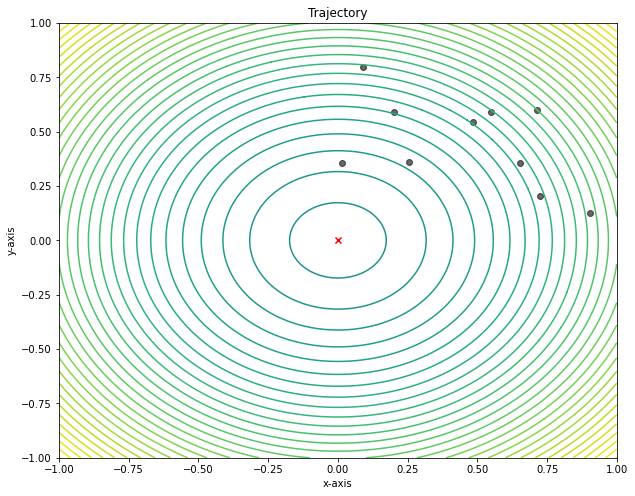

In [4]:
m = Mesher(func=fx.sphere)
# Make animation
animation = plot_contour(pos_history=optimizer.pos_history,
                         mesher=m,
                         mark=(0,0)) # Mark minima
animation.save('mymovie.mp4')
# Enables us to view it in a Jupyter notebook
HTML(animation.to_html5_video())

2021-10-27 14:07:31,836 - matplotlib.animation - INFO - Animation.save using <class 'matplotlib.animation.FFMpegWriter'>
2021-10-27 14:07:31,837 - matplotlib.animation - INFO - MovieWriter._run: running command: ffmpeg -f rawvideo -vcodec rawvideo -s 720x576 -pix_fmt rgba -r 12.5 -loglevel error -i pipe: -vcodec h264 -pix_fmt yuv420p -y 'C:\Users\User\AppData\Local\Temp\tmpupwxx_m1\temp.m4v'


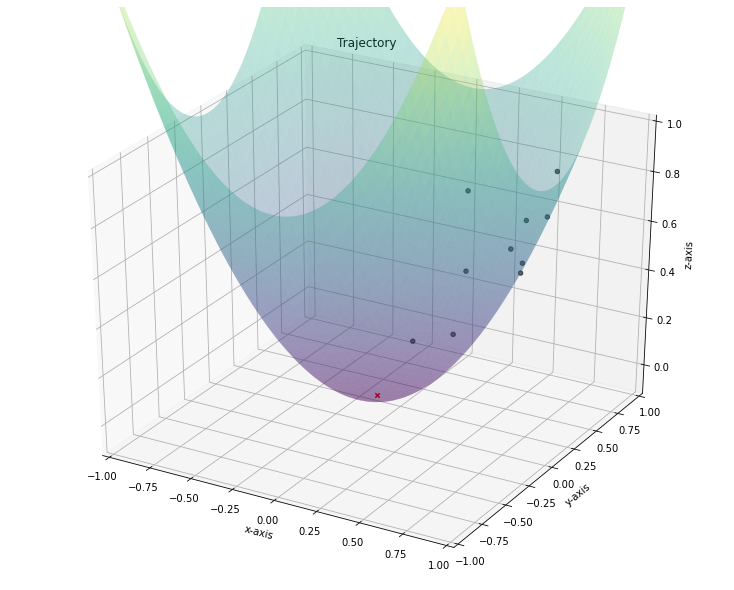

In [5]:
# preprocessing
pos_history_3d = m.compute_history_3d(optimizer.pos_history)
# adjust the figure
d = Designer(limits=[(-1,1), (-1,1), (-0.1,1)], label=['x-axis', 'y-axis', 'z-axis'])
# Make animation
animation3d = plot_surface(pos_history=pos_history_3d, 
                           mesher=m, designer=d,       
                           mark=(0,0,0))  # Mark minima

# Enables us to view it in a Jupyter notebook
HTML(animation3d.to_html5_video())